# Assignment 3: Non-Linear Models and Validation Metrics (50 marks total)
### Due: March 7 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (30 marks)

### *Part 1A: Decision Function* 

Building on the first part of the previous assignment, we would like to test how changing the decision boundary for a linear model impacts the results.

### Step 0: Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

### Step 1: Data Input (1 mark)

Load spam data using the same method as assignment 2.

In [5]:
# TO DO: Import spam dataset from yellowbrick library
import yellowbrick
from yellowbrick.datasets import load_spam

Next, we need to split the data into training and testing sets.

In [6]:
# TO DO: Split 10% of the data for the testing set (1 mark)
X, y = load_spam()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

### Step 2: Data Processing
Based on assignment 2, follow the same data processing steps (if needed)

In [7]:
# TO DO: Data processing steps (if needed)

### Step 3: Implement Machine Learning Model (2 marks)

1. Import `LogisticRegression` from sklearn
1. Instantiate model `LogisticRegression(max_iter=2000)`
1. Split training data into training and validation sets (use 20% of the data for validation)
1. Train the machine learning model

In [8]:
# TO DO: Split training data into training and validation sets and fit model to training data (2 marks)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train, y_train)



LogisticRegression(max_iter=2000)

### Step 4-5: Validate Model and Visualize Results (4 marks)

Next, we can print the classification report and confusion matrix for this data set using the training and validation data.

In [9]:
# TO DO: Print classification report (1 mark)
from sklearn.metrics import classification_report
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       538
           1       0.93      0.92      0.92       382

    accuracy                           0.94       920
   macro avg       0.94      0.94      0.94       920
weighted avg       0.94      0.94      0.94       920



In [10]:
# TO DO: Print confusion matrix (1 mark)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[512  26]
 [ 31 351]]


In this case, do we want to increase precision or recall? Based on your choice, select the appropriate direction to adjust the decision boundary. You can use either 1 or -1 as your new threshold, depending on your selected direction.

In [11]:
# TO DO: Predict values based on new decision function threshold and print classification report (1 mark)
from sklearn.metrics import classification_report

y_prob = model.predict_proba(X_val)[:,1]

threshold = 0.4

y_pred_new = (y_prob >= threshold).astype(int)
print(classification_report(y_val, y_pred_new))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       538
           1       0.90      0.93      0.92       382

    accuracy                           0.93       920
   macro avg       0.92      0.93      0.93       920
weighted avg       0.93      0.93      0.93       920



In [12]:
# TO DO: Print new confusion matrix (1 mark)

cm_new = confusion_matrix(y_val, y_pred_new)
print(cm_new)

[[497  41]
 [ 25 357]]


### Questions (6 marks)
1. Did you decide to move the threshold to increase recall or precision? Why?
1. How did your decision impact the number of false negatives and false positives? What is a potential unintended consequence of changing the decision boundary in this context?
1. Why did we use the validation data instead of the test data to check the new decision threshold?

- 1. Decided to move the threshold to increase recall to decrease the number of false negatives, because with false negatives mail that should be declared as spam is not declared as spam and could cause security risks so with increase of recall it allows for more spam to be caugh and decrease the false negatives.
- 2. My decision of increasing recall decreased the number of false negatives from 31 to 25, and increased number of false positives from 26 to 41. The potential unintended consequences of changing the decision boundary will result in more mail that is not spam to be declared as spam causing inconvenience for a user.
- 3. We used the validation data instead of test data to check with the new decision threshold to ensure the test data remains true with the model performance on new data. This helps with the making of unbiased decisions about the model's generalization capability.

### *Part 1B: Non-linear classification*

Using the spam dataset from part 1A, compare the performance of two non-linear models to the linear model used in assignment 2.

### Step 3: Implement Machine Learning Models

1. Import `LogisticRegression`, `SVC` and `RandomForestClassifier` from sklearn
2. Instantiate models as `LogisticRegression(max_iter=2000)`, `SVC()` and `RandomForestClassifier(random_state=0, max_depth=10)`
3. Implement the machine learning models using cross-validation (Step 4)

### Step 4: Validate Model 

Calculate the training and validation accuracy for the three different models mentioned in Step 3. For this case, you can use `cross_validate()` with `cv=5` and `scoring='accuracy'` to get the training and validation data for each of the three models and calculate the accuracy results.

### Step 5.1: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
1. Add the training accuracy and validation accuracy for each model to the `results` DataFrame
1. Add the model names as the index for the DataFrame
1. Print `results`

In [13]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

log_reg = LogisticRegression(max_iter=2000)
svc = SVC()
rf_clf = RandomForestClassifier(random_state=0, max_depth=10)


from sklearn.model_selection import cross_validate
import pandas as pd

models = {
    'Logistic Regression': log_reg,
    'Support Vector Classifier': svc,
    'Random Forest Classifier': rf_clf
}

results = {
    'Model': [],
    'Training Accuracy': [],
    'Validation Accuracy': []
}

for model_name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)
    results['Model'].append(model_name)
    results['Training Accuracy'].append(cv_results['train_score'].mean())
    results['Validation Accuracy'].append(cv_results['test_score'].mean())

results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)


print(results_df)

                           Training Accuracy  Validation Accuracy
Model                                                            
Logistic Regression                 0.931196             0.912174
Support Vector Classifier           0.716576             0.705435
Random Forest Classifier            0.968641             0.925000


SVM is sensitive to feature ranges, so scaling may be needed. Look at the feature ranges and try using a scaling method to see if the SVM results are improved.

In [14]:
# TO DO: Look at the ranges for each feature (0.5 marks)
# Hint: there is a built-in pandas function that you can use to view the statistics of your data
print(pd.DataFrame(X).describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4600.000000        4600.000000    4600.000000   4600.000000   
mean         0.104576           0.212922       0.280578      0.065439   
std          0.305387           1.290700       0.504170      1.395303   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4600.000000     4600.000000       4600.000000         4600.000000   
mean        0.312222        0.095922          0.114233            0.105317   
std         0.672586        0.273850          0.391480            0.401112   
min         0.000000        0.

In [15]:
# TO DO: Implement scaling for SVM and print training and validation accuracies (1.5 marks)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svc = SVC()

cv_results = cross_validate(svc, X_scaled, y, cv=5, scoring='accuracy', return_train_score=True)
print('Training Accuracy:', cv_results['train_score'].mean())
print('Validation Accuracy:', cv_results['test_score'].mean())

Training Accuracy: 0.9483695652173914
Validation Accuracy: 0.9230434782608695


Which model gave us the best results? Use that model for the next section.

### Step 5.2: Visualize Classification Errors (3 marks)

In this section, print the classification report and confusion matrix to investigate the recall vs. precision for the best model. Use the full training set and testing set for this analysis.

In [16]:
# TO DO: Train model and find predicted values for testing set using best model (1 mark)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_spam()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf_clf = RandomForestClassifier(random_state=0, max_depth=10)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', test_accuracy)


Test Accuracy: 0.9510869565217391


In [17]:
# TO DO: Print classification report (1 mark)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       538
           1       0.96      0.92      0.94       382

    accuracy                           0.95       920
   macro avg       0.95      0.95      0.95       920
weighted avg       0.95      0.95      0.95       920



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

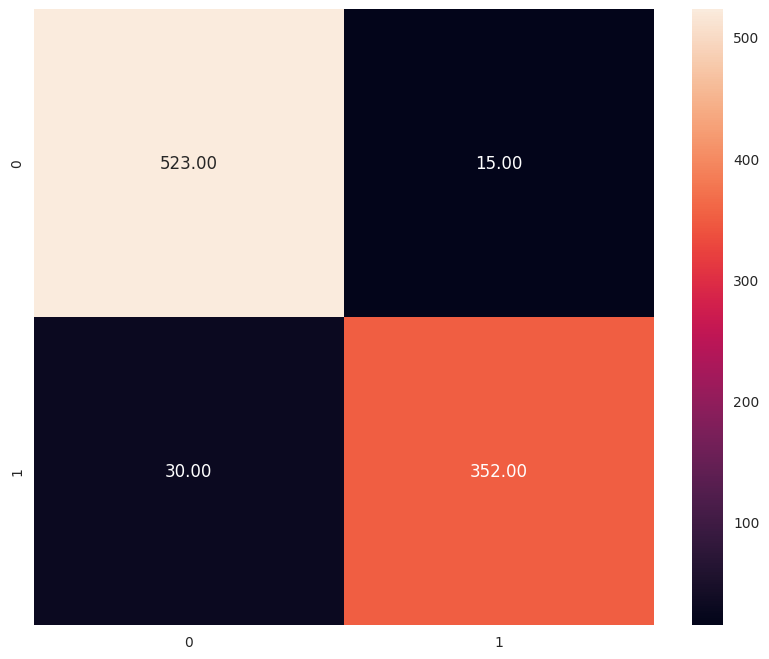

In [18]:
# TO DO: Print confusion matrix using a heatmap (1 mark)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.2f')
plt.show()

### Questions (6 marks)
1. Which model did you select for part 5.2? How did it compare to the other models? 
1. Looking at the feature ranges, would a tree-based model or SVM make more sense for this dataset? Did using scaling for SVM improve the results? How did it perform compared to the random forest model?
1. In your opinion, is it better to focus on changing the decision threshold or changing the model to improve precision/recall results? Why?

*ANSWER HERE*
- 1. Selected model for part 5.2 was the Random Forest Classifier. It had the highest validation accuracy of 0.925 while the other models were below that mark, thus choosing the Random Forest Classifier.
- 2. Looking at the feature ranges, a tree based model makes more sense for the dataset because they are not sensitive to feature scaling and handle features with different ranges. Using scaling for SVM did improve results, but it still preformed worse than the Random Forest model, with a lower validation accuracy than the Random Forest Classifier.
- 3. In my opinion, it is better to focus on changing the model to improve precision/recall results rather than changing the decision threshold. This is because selecting a more suitable model can help provide better performance and generalization. While adjusting the decision threshold can helps the balance between precision and recall, it does not address limitations of the model itself. A more robust model can achieve better overall performance and may require less threshold adjustment to meet the desired precision/recall balance.

### Process Description (4 marks)
Please describe the process you used to create your code for parts A and B. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

The code was sourced from course material, the previous assignment and help from generative AI, as well as the libraries documentations were referenced. Steps were used from loading spam dataset, implementing machine learning models used, preform cross-validation to evaluate models and compare performances, selected the best model which was the Random Forest Classifier, evaluated the model on testing data and printed coresponding confusion matrix. Promps used with generative AI were "Explain this function", "Implement training for this model", "Calculate training and Validation accuracy", code was adjusted to fit the requirements as some of the models implementations were different than the requirements for the assignment. Yes, the only challenge was a Font Issue for plotting the confusion matrix with a heatmap but I did not need to change anything for it but the error would still be displayed but the plot was also there.

## Part 2: Regression (18 marks)

For this section, we will be using the concrete example from yellowbrick. Since this dataset is highly non-linear, we will be evaluating how well different tree-based models work for this case.

You will need to repeat the steps from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be imported using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [19]:
# TO DO: Import concrete dataset from yellowbrick library (1 mark)
from yellowbrick.datasets import load_concrete

X, y = load_concrete()

### Step 2: Data Processing (1 mark)

Check if there are any missing values and fill them in if necessary. Remove any non-numeric columns.

In [26]:
# TO DO: Process the data - fill-in any missing values and remove any non-numeric columns (0.5 marks)
print(f"Missing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum().sum()}")

Missing values in X: 0
Missing values in y: 0


The concrete data should already be split into the feature matrix and target vector. Inspect the first few columns of the feature matrix.

In [27]:
# TO DO: Inspect the first few rows of the feature matrix (0.5 marks)
print(X.head())

   cement   slag  ash  water  splast  coarse   fine  age
0   540.0    0.0  0.0  162.0     2.5  1040.0  676.0   28
1   540.0    0.0  0.0  162.0     2.5  1055.0  676.0   28
2   332.5  142.5  0.0  228.0     0.0   932.0  594.0  270
3   332.5  142.5  0.0  228.0     0.0   932.0  594.0  365
4   198.6  132.4  0.0  192.0     0.0   978.4  825.5  360


### Step 3: Implement and Validate Machine Learning Model (7 marks)

1. Import any required libraries
1. Split the data into training and testing sets (testing data should be 10% of the dataset)
1. Train and validate the Decision Tree model with the training set (use `cross_validate()` with `cv=5` and `scoring='r2'`)
    1. Test five different max_depth values: 3, 5, 7, 9 and 11
1. Print the training and validation accuracy for the best max_depth results. Which max_depth gave us the best results?

**Note**: for any random state parameters, you can use random_state = 0

In [28]:
# Split training and testing sets (1 mark)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [31]:
# Test max_depths of 3, 5, 7, 9 and 11 for a decision tree model to find the best results (3 marks)
# Hint: It is easier if you use a loop to evaluate each max_depth
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

max_depth_values = [3, 5, 7, 9, 11]
results = {
    'Max Depth': [],
    'Training R2': [],
    'Validation R2': []
}

for max_depth in max_depth_values:
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
    results['Max Depth'].append(max_depth)
    results['Training R2'].append(cv_results['train_score'].mean())
    results['Validation R2'].append(cv_results['test_score'].mean())

print(pd.DataFrame(results))

   Max Depth  Training R2  Validation R2
0          3     0.636925       0.572823
1          5     0.821295       0.710786
2          7     0.917904       0.778084
3          9     0.967862       0.811541
4         11     0.988483       0.810826


Now that we have found the best results for a decision tree model with this dataset, let's compare this result to using `Random_Forest` or `GradientBoosting`. For both models, use `max_depth=5`.

In [ ]:
# TO DO: Calculate and display training and validation accuracies for both models using default hyperparameters (3 marks)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate


rf_model = RandomForestRegressor(random_state=0, max_depth=5)
gb_model = GradientBoostingRegressor(random_state=0)

results = {
    'Model': [],
    'Training R2': [],
    'Validation R2': []
}

for model in [rf_model, gb_model]:
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
    results['Model'].append(model.__class__.__name__)
    results['Training R2'].append(cv_results['train_score'].mean())
    results['Validation R2'].append(cv_results['test_score'].mean())

results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)

print(results_df)


                           Training R2  Validation R2
Model                                                
RandomForestRegressor         0.886946       0.819554
GradientBoostingRegressor     0.951448       0.902653


Which model gave us the best results? Use that model for the next step.

The GradeientBoostingRegressor gave us the best results.

### Step 4: Test Model (1 mark)

Select the best model and calculate the testing accuracy using the R^2 score

In [25]:
# TO DO: Find test score using best model (1 mark)


### Questions (4 marks)
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*